# 📚 **Dependencies Library**

In [1]:
!pip -q install kaggle

In [85]:
from google.colab import files
import os

# Library Data Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 🚋 **Data Collecting**


Section 1 is data collecting, in this section we will use data from external source, that is from Kaggle. The dataset is **House Prices - Advanced Regression Techniques**.

You can access this data in this [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

The dataset contain several files, that include train.csv, test.csv, data_description.txt, and sample_submission.csv.

# 🪒 **Data Loading**

In [76]:
def load_data(data_name):
    """
    Downloads and extracts competition data from Kaggle in Google Colab.

    This function checks if the `kaggle.json` API key is present. If not, it prompts
    the user to upload it. It then uses the Kaggle API to download the dataset
    associated with the specified competition name and extracts it into a directory.

    Args:
    - data_name (str): The name of the Kaggle competition to download data from.

    Example:
    - load_data('house-prices-advanced-regression-techniques')

    Notes:
    - Ensure the Kaggle API is enabled and `kaggle.json` is downloaded
      from your Kaggle account.
    - The Kaggle API key (`kaggle.json`) must have proper permissions and
      be placed in the `~/.kaggle` directory.
    - If there an error about competition permission, accept competition
      rules and rerun this code.
    """

    # Check if kaggle.json already exists
    kaggle_path = os.path.expanduser("~/.kaggle/kaggle.json")
    if not os.path.exists(kaggle_path):
        print("kaggle.json not found. Please upload the file.")

        # Upload the kaggle.json file
        uploaded = files.upload()

        # Move the kaggle.json file to the correct location
        os.makedirs(os.path.dirname(kaggle_path), exist_ok=True)
        with open(kaggle_path, "wb") as f:
            f.write(uploaded['kaggle.json'])

        # Set proper permissions
        os.chmod(kaggle_path, 0o600)
        print("kaggle.json successfully uploaded and configured.")
    else:
        print("kaggle.json already exists. Skipping upload.")

    # Download the dataset
    print(f"Downloading dataset: {data_name}")
    os.system(f"kaggle competitions download -c {data_name}")

    # Unzip the dataset
    unzip_dir = f"{data_name}_data"
    os.makedirs(unzip_dir, exist_ok=True)
    os.system(f"unzip {data_name}.zip -d {unzip_dir}")
    print(f"Dataset extracted to: {unzip_dir}")

In [77]:
# Load the Data

data_name = 'house-prices-advanced-regression-techniques'
load_data(data_name)

kaggle.json already exists. Skipping upload.
Dataset extracted to: house-prices-advanced-regression-techniques_data


In [78]:
test_data = pd.read_csv(f'{data_name}_data/test.csv')
train_data = pd.read_csv(f'{data_name}_data/train.csv')

In [79]:
test_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [80]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 🔁 **Data Cleaning dan Transformation**

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
train_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## **Step 1 : Handle Missing Value**

In [69]:
# This code is use to get all of the data in column that
# contain a missing value, if the data sum is 0 that means there is no missing
# value in that column

missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [70]:
# This code use for to indentify what datatype of the column that have
# missing values.

missing_columns = missing_values.index
missing_train_data = train_data[missing_columns]
missing_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [71]:
# This code use for filter the missing value data that over and
# below 75%, which mean will filter data
# less than 1000 and over than 1000

less_data = missing_values[missing_values < 1000].index
over_data = missing_values[missing_values > 1000].index

# This code use for handle missing data that just contain numeric number
numeric_features = train_data[less_data].select_dtypes(include="number").columns
train_data[numeric_features] = train_data[numeric_features].fillna(train_data[numeric_features].median())

# This code use for handle missing data that just contain
# object or string data type
kategorical_features = train_data[less_data].select_dtypes(include="object").columns
train_data[kategorical_features] = train_data[kategorical_features].fillna(train_data[kategorical_features].mode().iloc[0])

# This code use for handle missing data that over 1000 data.
# Because the missing data is to much so we can impute that column.
train_data.drop(columns=over_data, inplace=True)

In [72]:
# Check the result of handle missing data
missing_values_final = train_data.isnull().sum()
missing_values_final = missing_values_final[missing_values_final > 0]
missing_values_final

,0


## **Step 2: Handle Outliers Data**

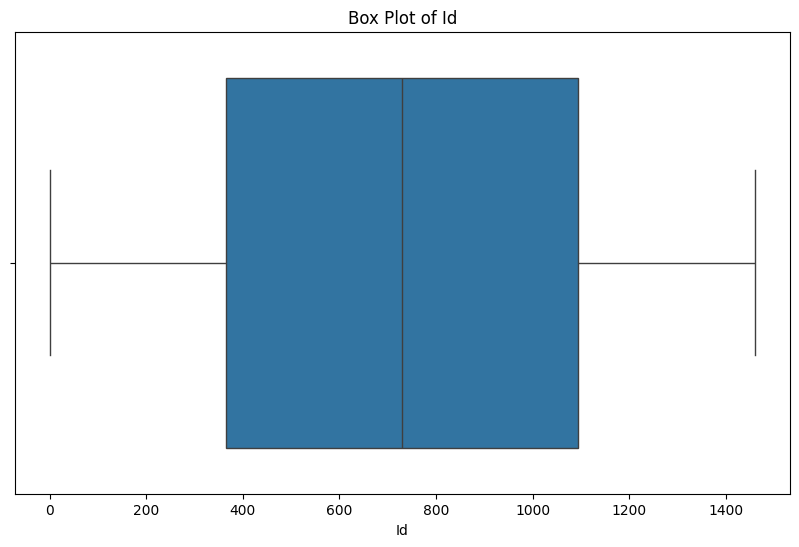

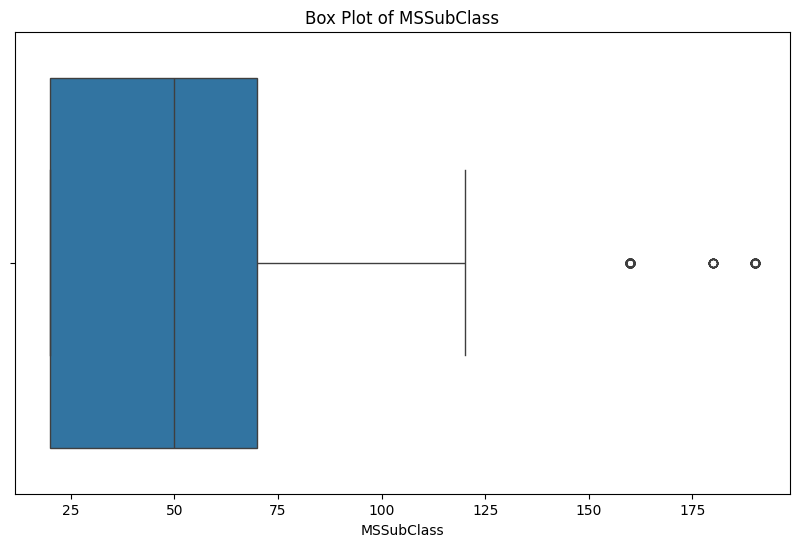

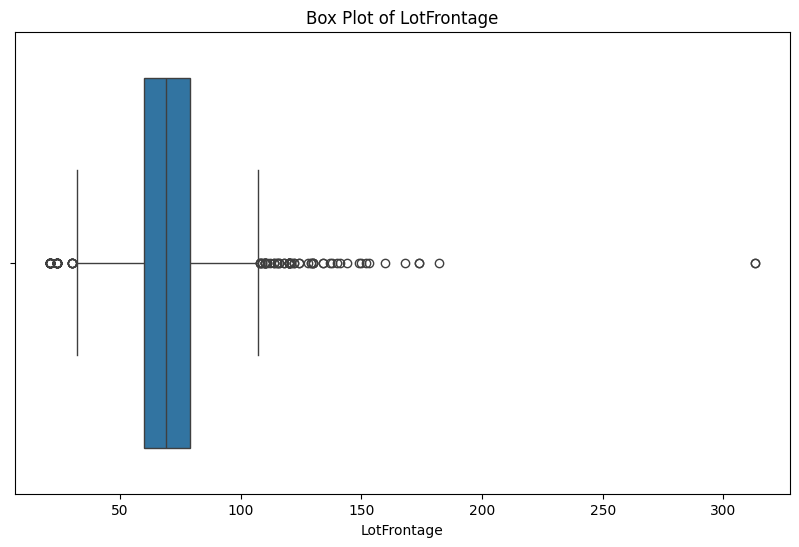

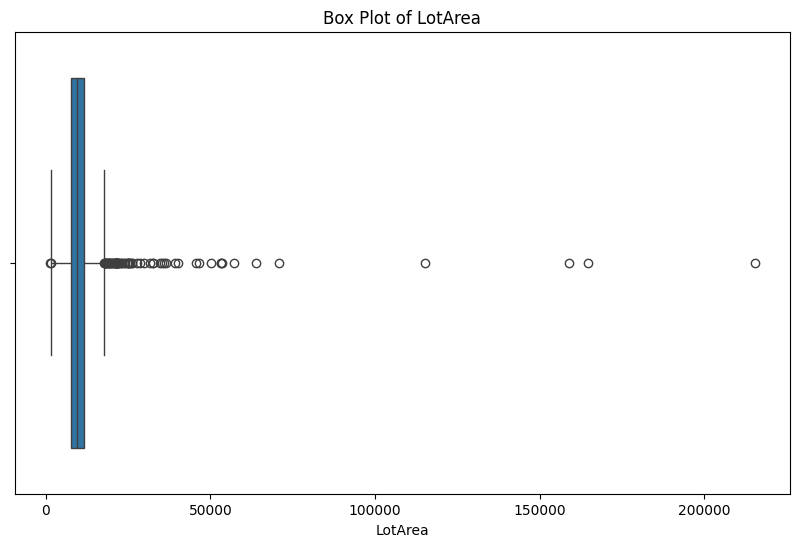

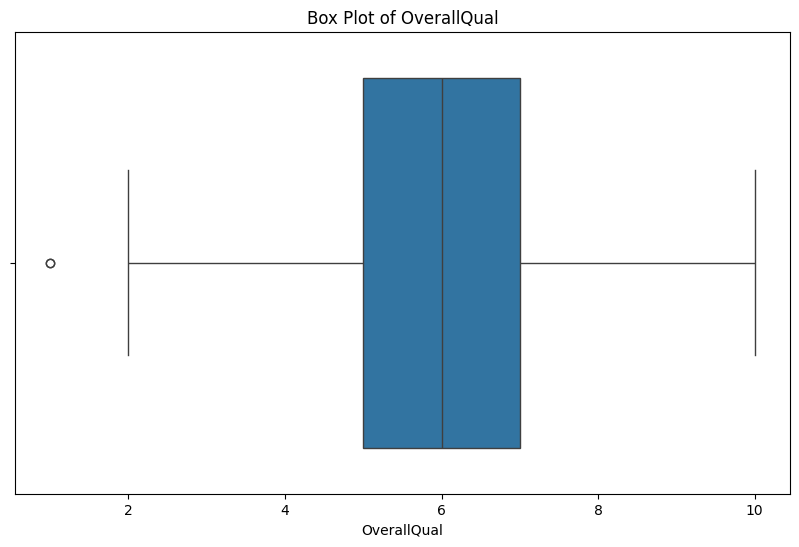

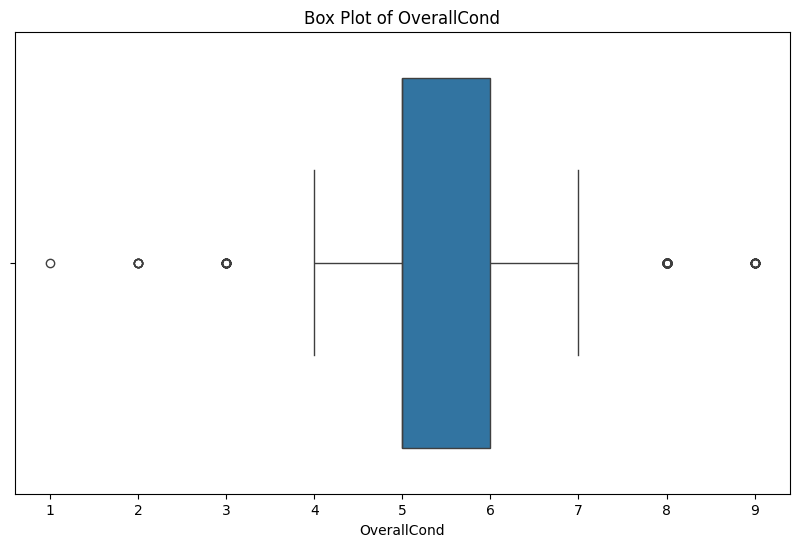

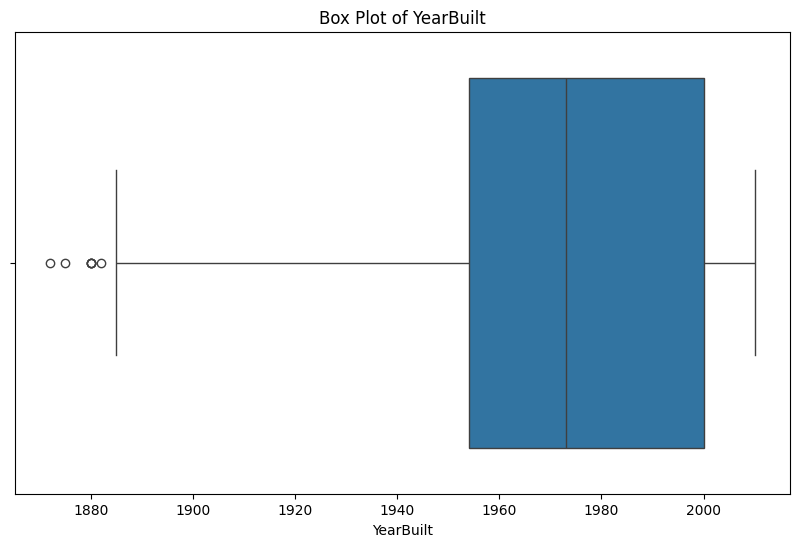

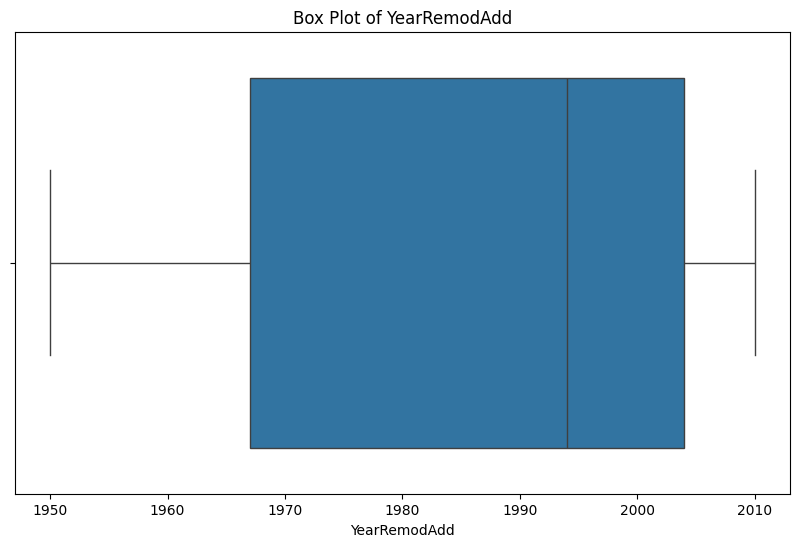

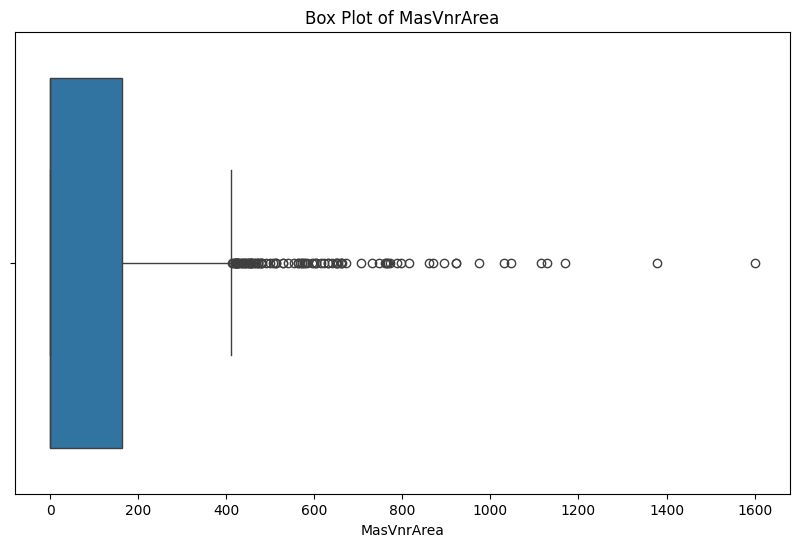

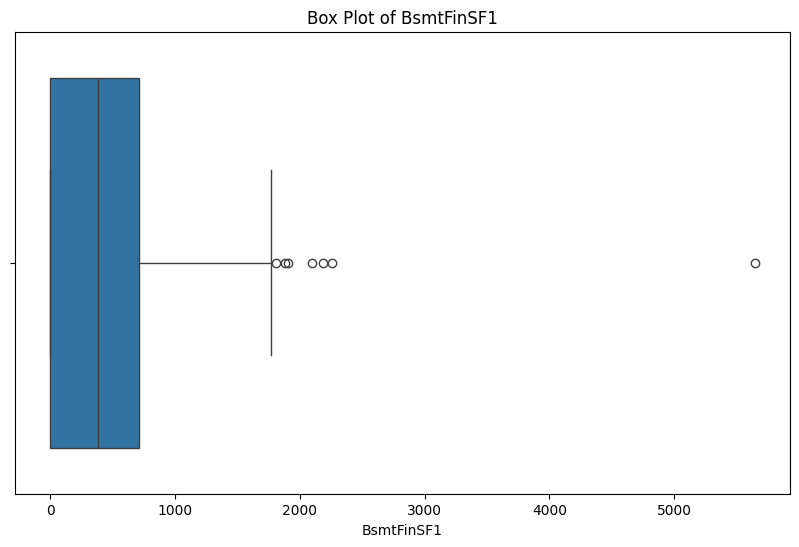

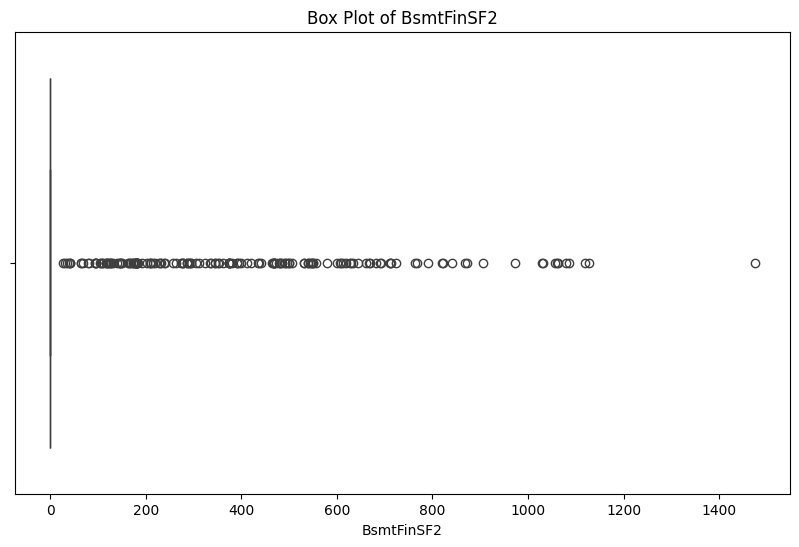

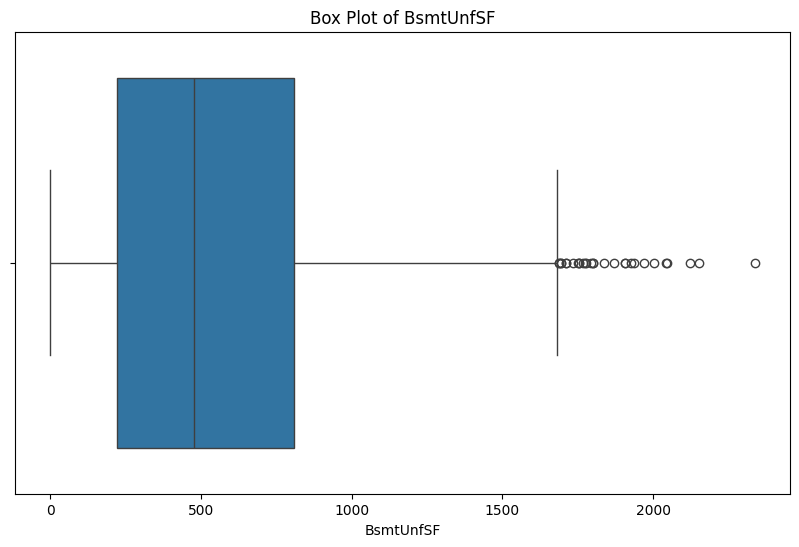

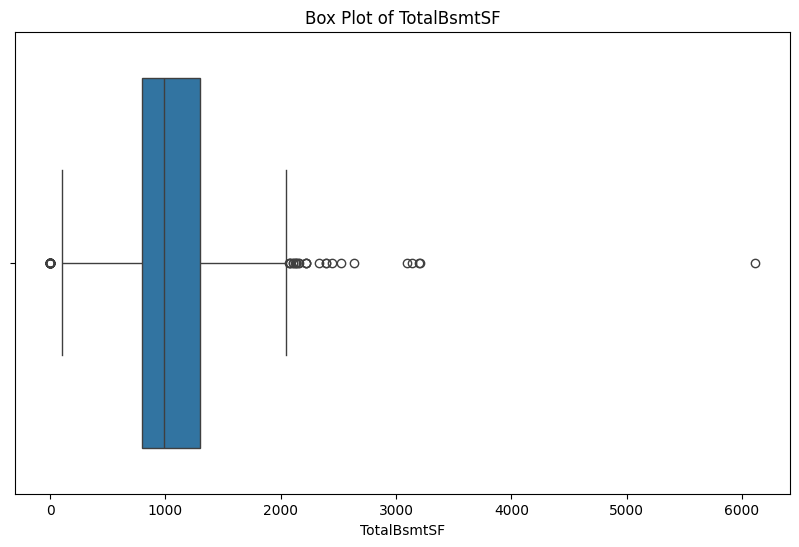

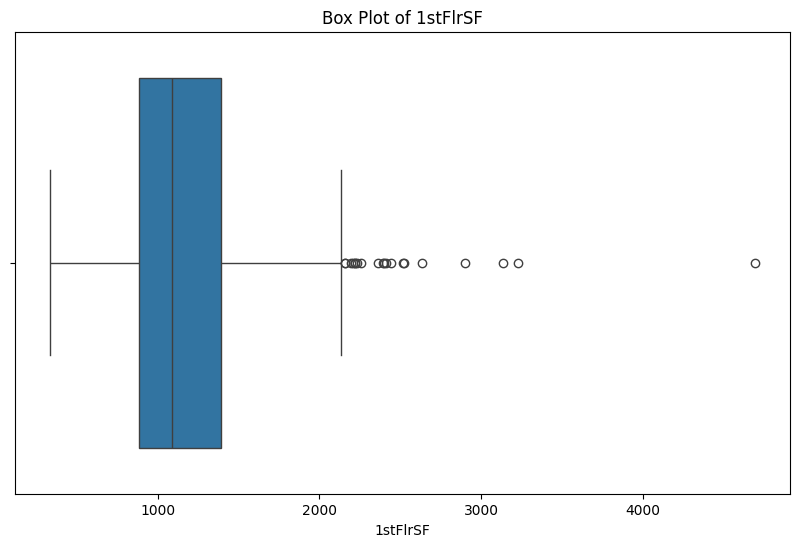

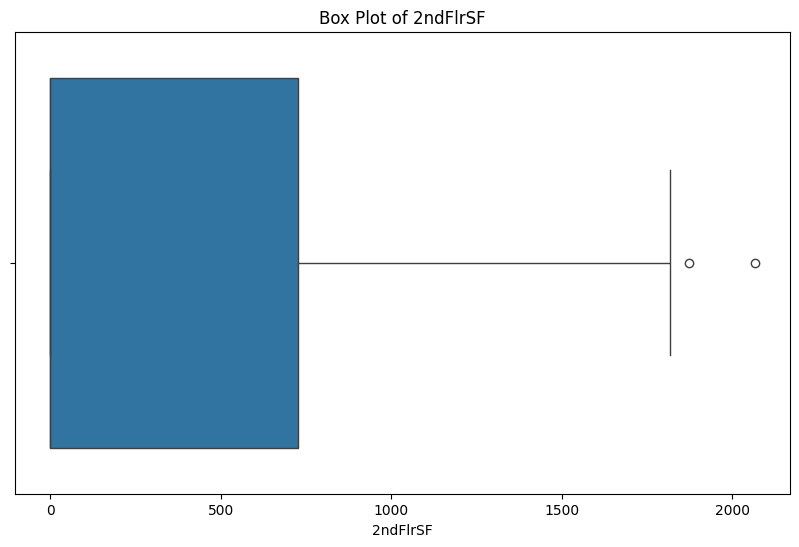

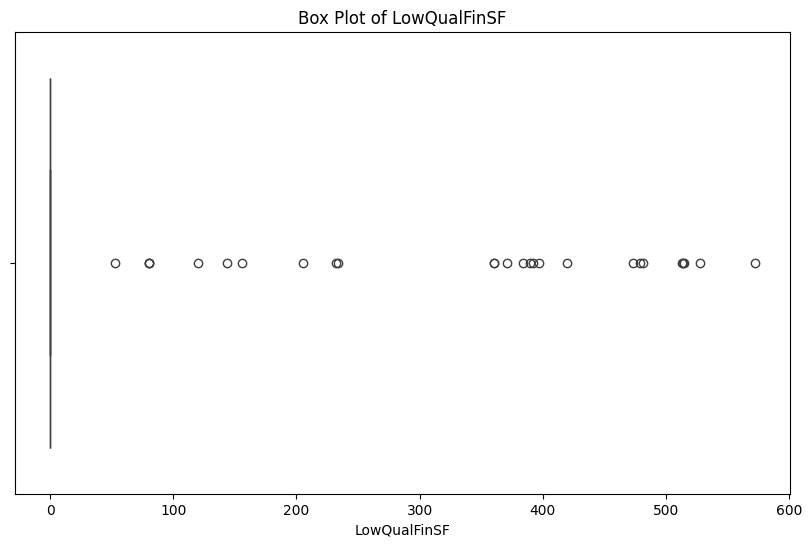

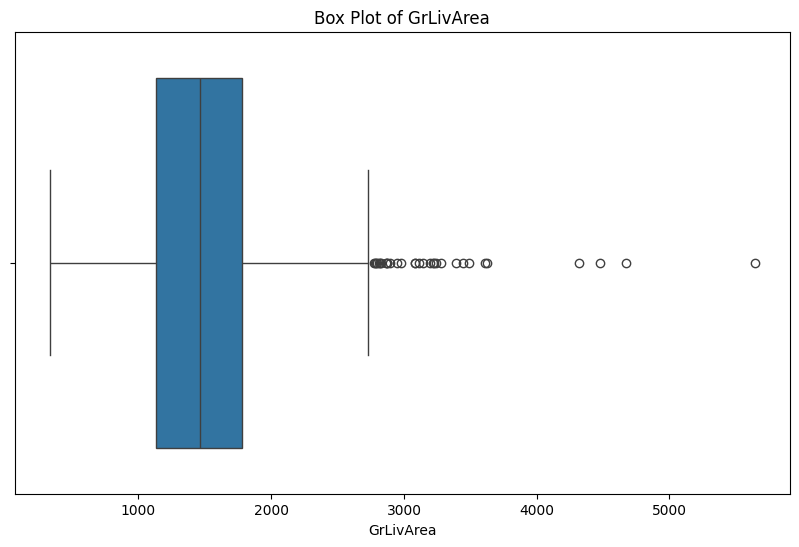

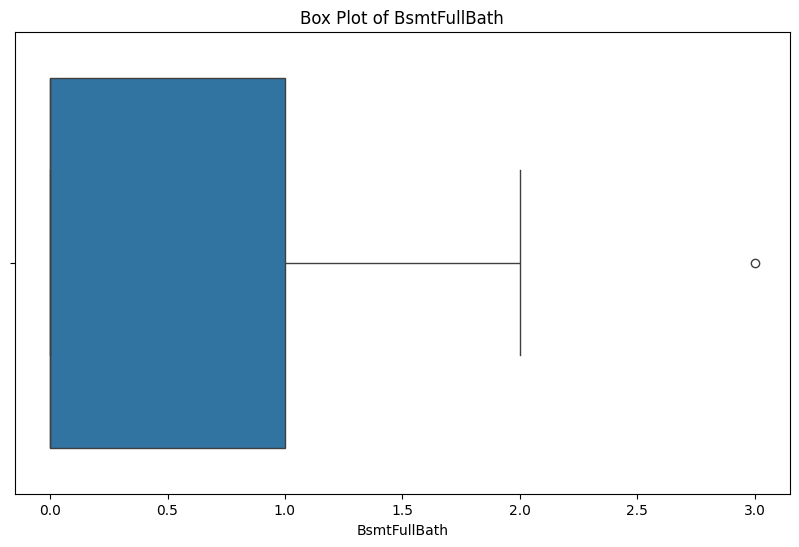

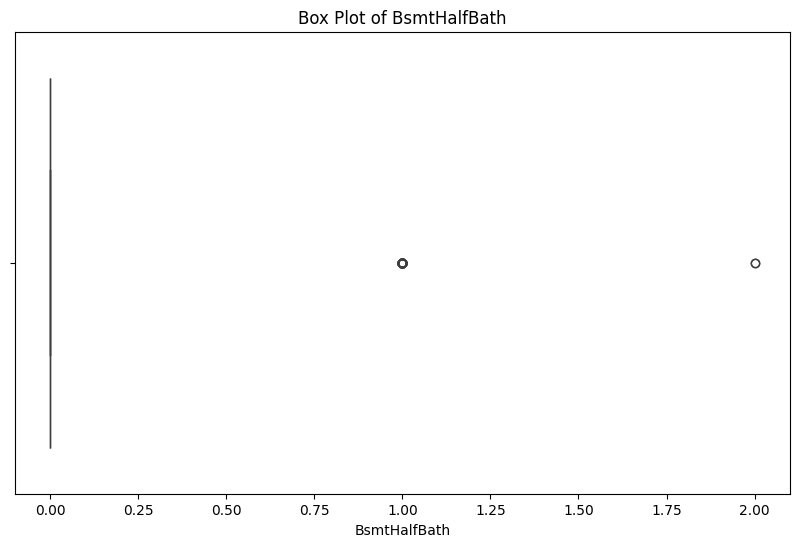

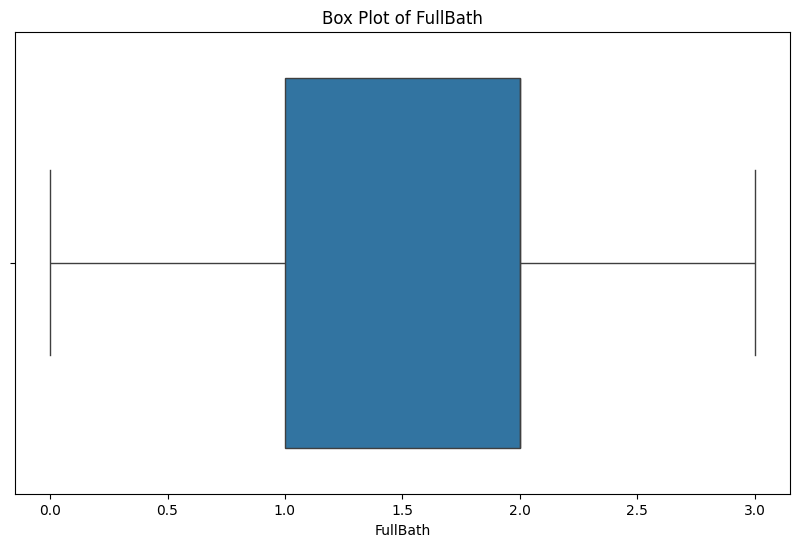

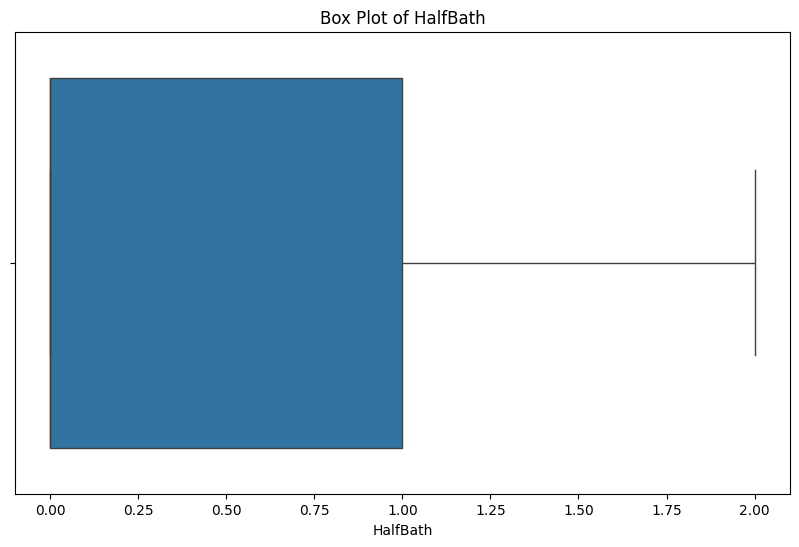

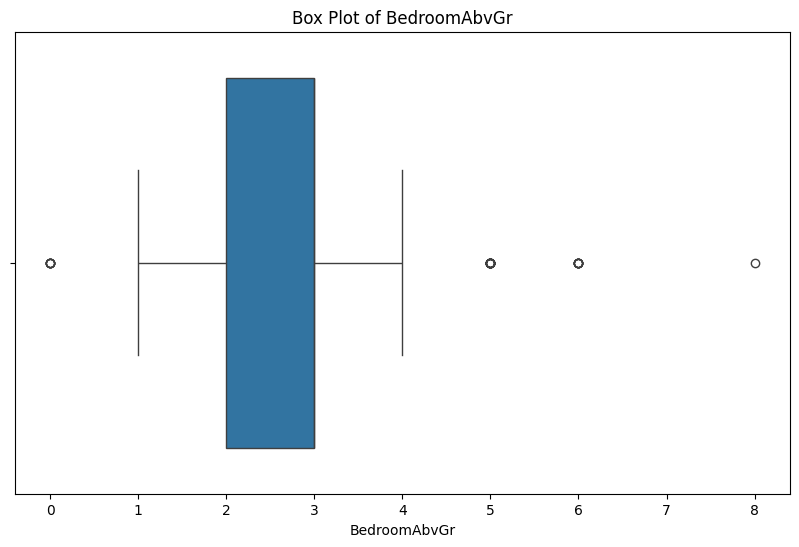

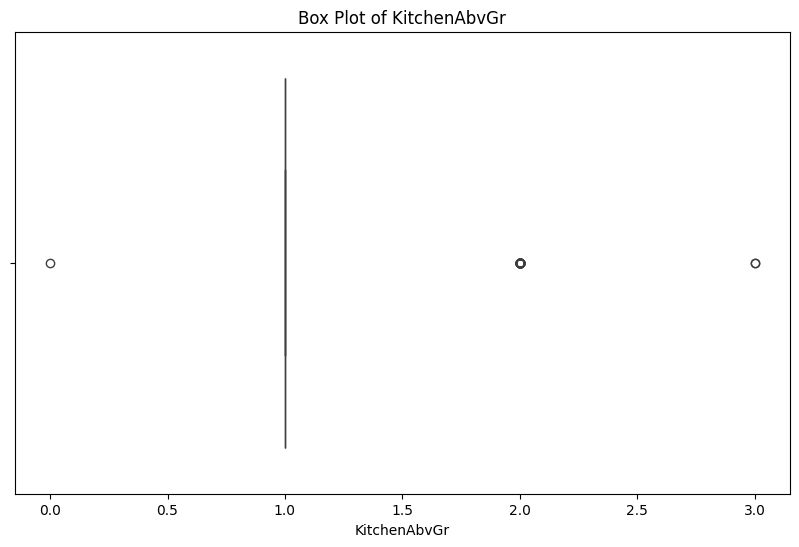

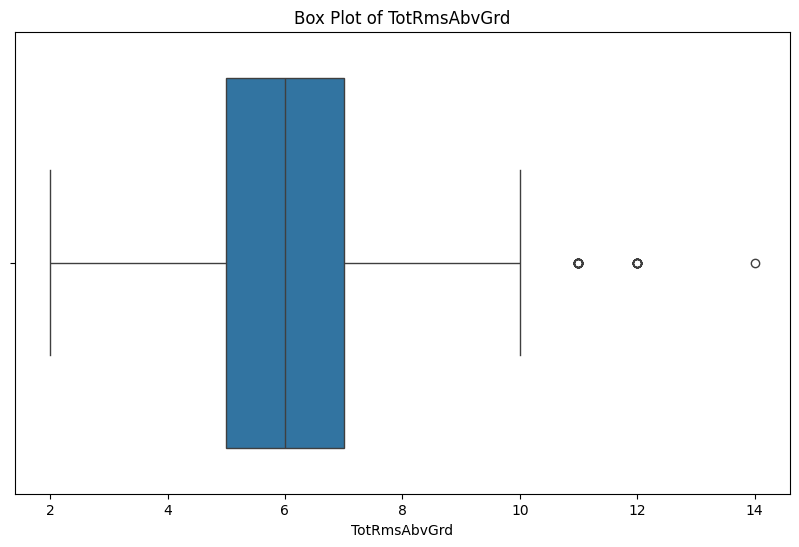

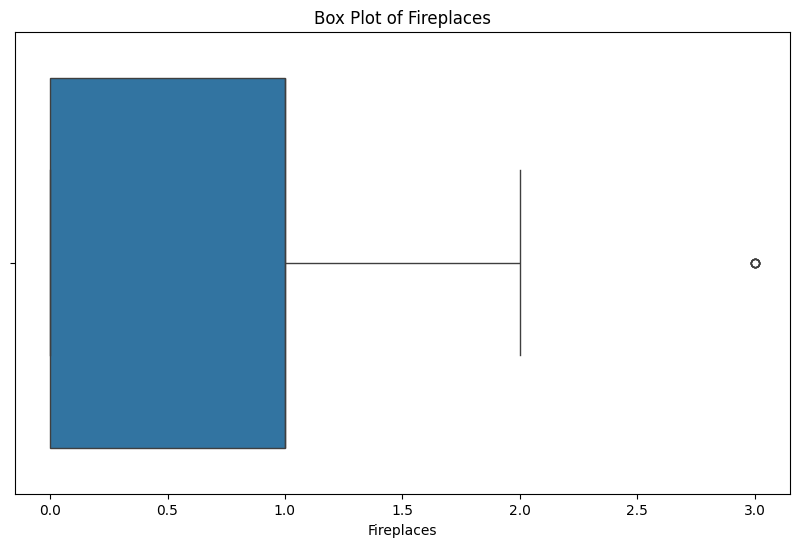

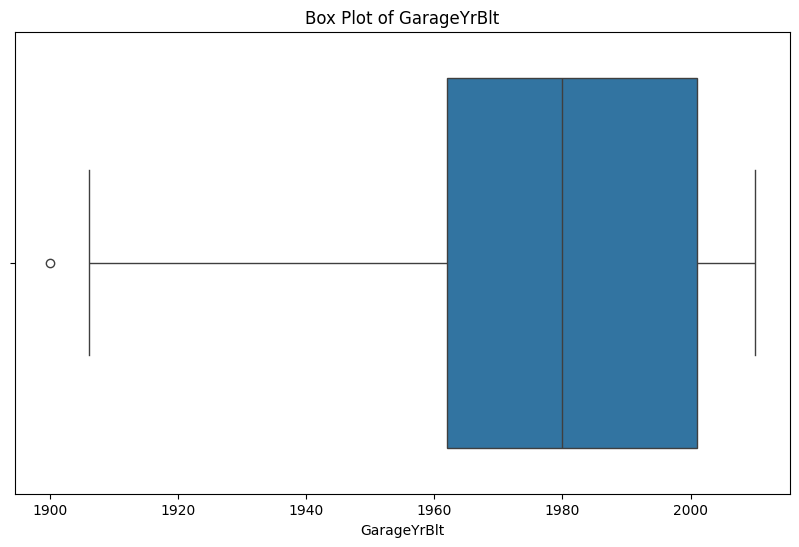

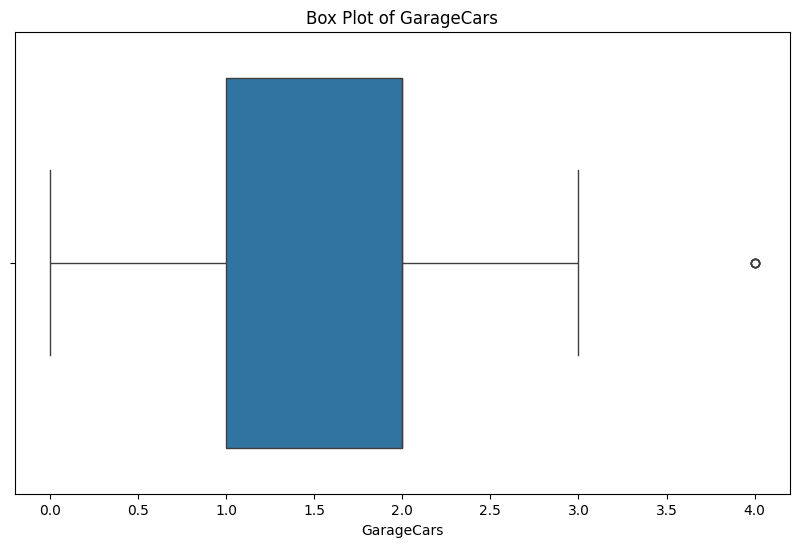

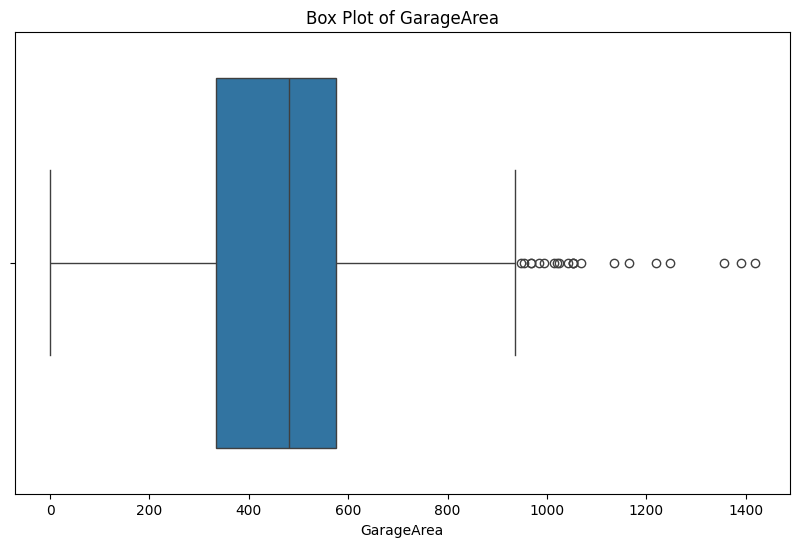

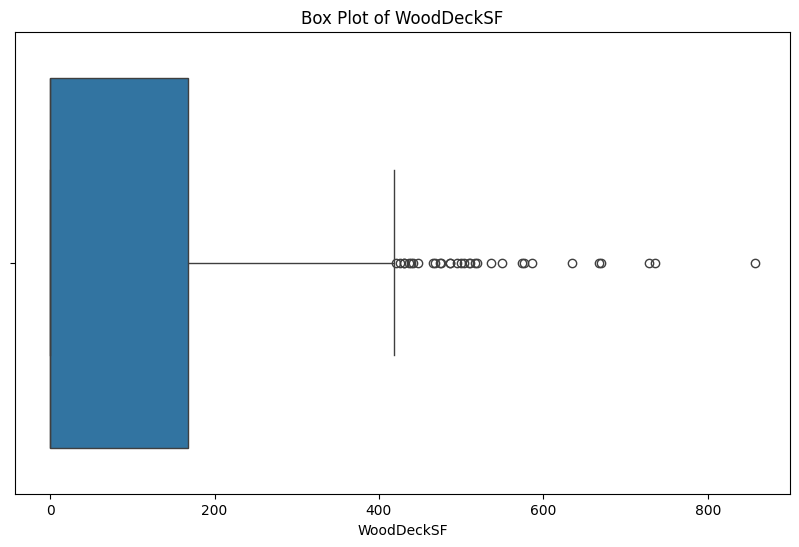

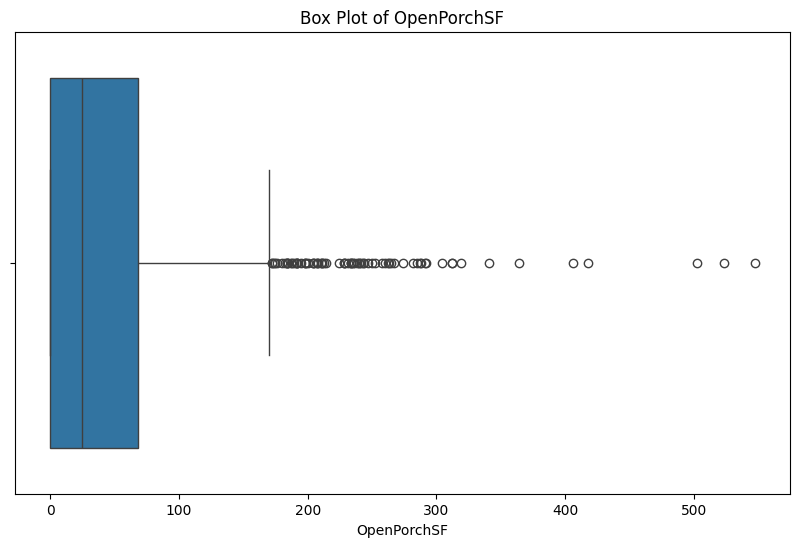

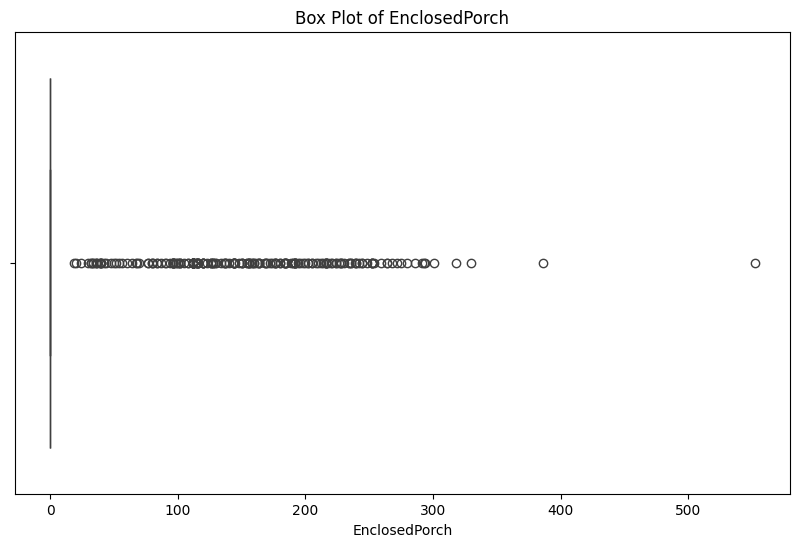

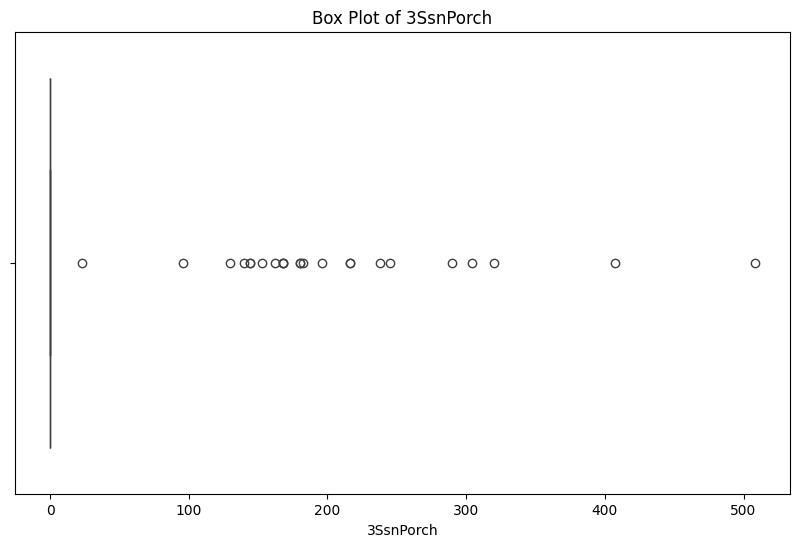

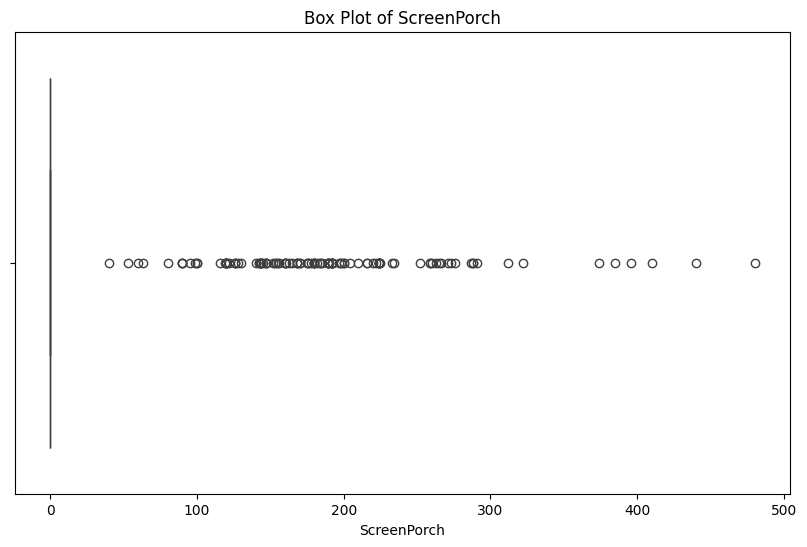

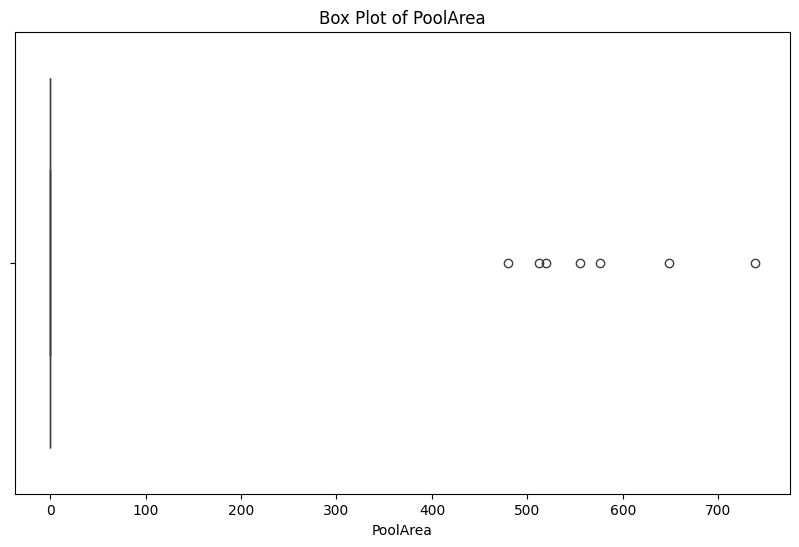

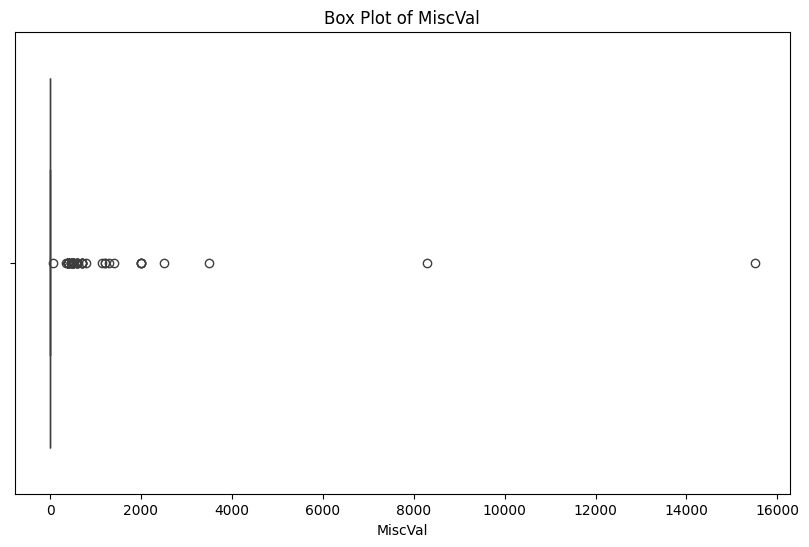

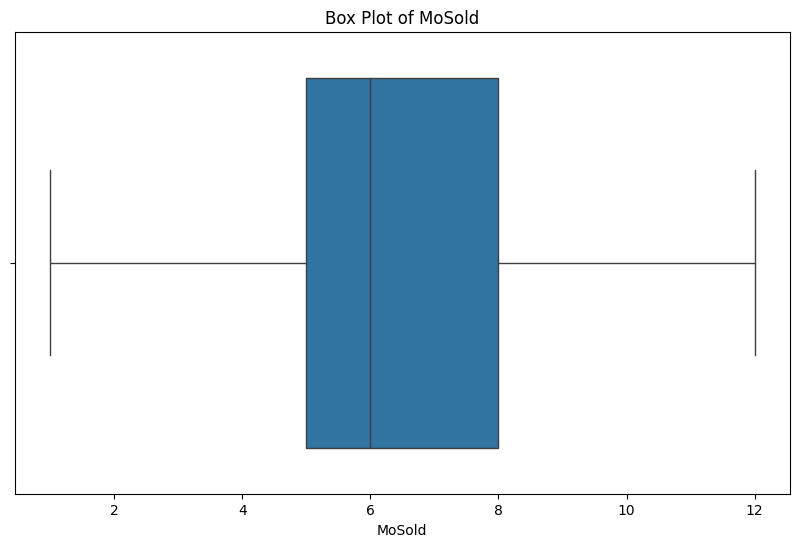

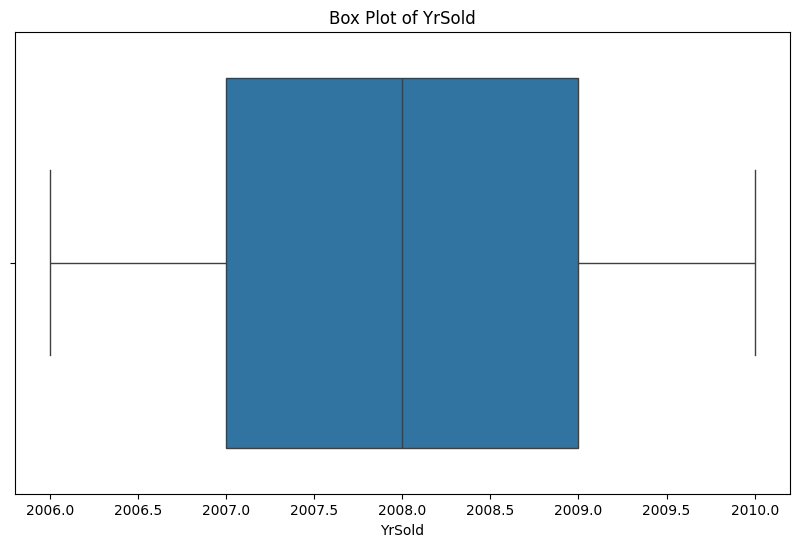

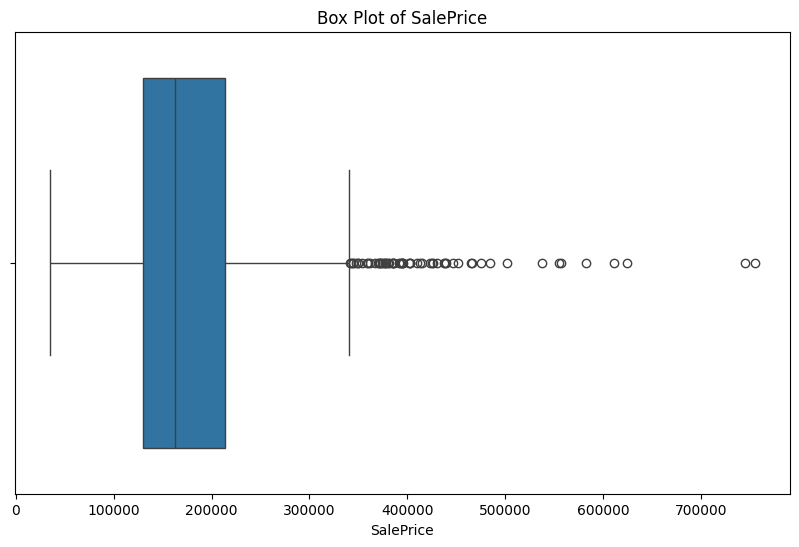

In [73]:
# This code will show the visualization of the column
# using box-plot, to see if the numeric column has an outliers data.
numeric_features = train_data.select_dtypes(include="number").columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=train_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [74]:
# This code use for imputed the outliers data.
# Assume the outliers data is not impact significantly to data
# because human error.
# The method that will use is IQR (Interquartile) Technique
q1 = train_data[numeric_features].quantile(0.25)
q3 = train_data[numeric_features].quantile(0.75)
IQR = q3 - q1

filter_features = ~((train_data[numeric_features] < (q1 - 1.5 * IQR)) | (train_data[numeric_features] > (q3 + 1.5 * IQR))).any(axis=1)
filter_numeric_train = train_data.loc[filter_features, numeric_features]

# This code use for merger the numerical features that already free from outlier
# with categorical data.
categorical_features = train_data.select_dtypes(include="object").columns
train_data = pd.concat([filter_numeric_train, train_data.loc[filter_features, categorical_features]], axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 1455
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             557 non-null    int64  
 1   MSSubClass     557 non-null    int64  
 2   LotFrontage    557 non-null    float64
 3   LotArea        557 non-null    int64  
 4   OverallQual    557 non-null    int64  
 5   OverallCond    557 non-null    int64  
 6   YearBuilt      557 non-null    int64  
 7   YearRemodAdd   557 non-null    int64  
 8   MasVnrArea     557 non-null    float64
 9   BsmtFinSF1     557 non-null    int64  
 10  BsmtFinSF2     557 non-null    int64  
 11  BsmtUnfSF      557 non-null    int64  
 12  TotalBsmtSF    557 non-null    int64  
 13  1stFlrSF       557 non-null    int64  
 14  2ndFlrSF       557 non-null    int64  
 15  LowQualFinSF   557 non-null    int64  
 16  GrLivArea      557 non-null    int64  
 17  BsmtFullBath   557 non-null    int64  
 18  BsmtHalfBath  

Another method that can use to handle outliers data:
1. Use agregation method like using median as a value to change value that consider outliers.
```
median = df['column_name'].median()
df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)
```

2. Change the outliers data with closest value in below or above IQR boundary.
  *   Below : Q1 - 1.5 * IQR
  *   Above : Q3 + 1.5 * IQR

  ```
  df['column_name'] = df['column_name'].apply(lambda x: (Q1 - 1.5  IQR) if x < lower_bound else (Q3 + 1.5  IQR) if x > (Q3 + 1.5 * IQR) else x)
  ```



## **Step 3: Normalization and Standarization Data**

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1BtznWddMSjy1R1PZj1C3BffmJ2SCrV4o" width="720" height="480">
</div>

---

**When will use normalization and standardization?**

**1. Normalization**

- Purpose: Rescales data to a specific range, typically [0, 1].

- When to Use
  - When the features in the dataset have different scales or units.
  - When using machine learning models that rely on distance calculations, such as K-Nearest Neighbors (KNN) or K-Means Clustering.
  - When the data is not normally distributed, and you want to treat all values proportionally.
  - When you need all features to contribute equally to the model and prevent any one feature from dominating due to its scale.

- Effect: After normalization, all feature values are scaled within the range [0, 1], ensuring that the model treats each feature on the same scale.

**2. Standardization**

- Purpose: Transforms the data to have a mean of 0 and a standard deviation of 1.

- When to Use:
  - When the data is approximately normally distributed or you assume the underlying data follows a Gaussian distribution.
  - When using machine learning models that are sensitive to the scale of data, particularly regression models like Linear Regression, Logistic Regression, or models that assume a Gaussian distribution (e.g., Standardized Regression).
  - If the features in the dataset have different scales or units, and you want to make them comparable, but maintaining their underlying relationships.

- Effect: After standardization, the data has zero mean and unit variance, making it suitable for algorithms that assume a standard distribution or are sensitive to the scale of input features.

---

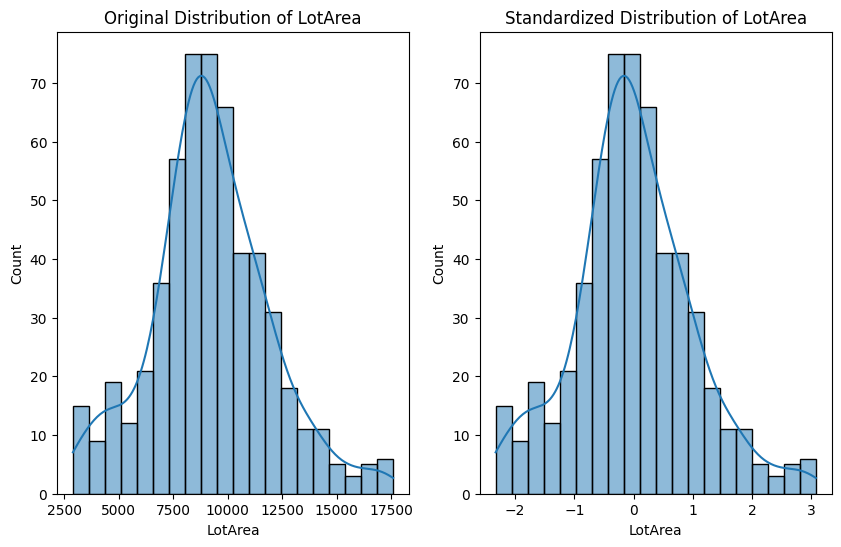

In [75]:
# This code use for standardization numeric feature in data.
# The reason choose standardization is according to model machine learning
# that is regression model.
scaler = StandardScaler()
train_data_scaled = train_data.copy()
train_data_scaled[numeric_features] = scaler.fit_transform(train_data_scaled[numeric_features])

# This code will show visualization of example one of feature that have been
# do a standardization.
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data[numeric_features[3]], kde=True)
plt.title(f'Original Distribution of {numeric_features[3]}')

plt.subplot(1, 2, 2)
sns.histplot(train_data_scaled[numeric_features[3]], kde=True)
plt.title(f'Standardized Distribution of {numeric_features[3]}')
plt.show()

## **Step 4: Handle Duplicated Data**

In [84]:
# This code use for check the duplicated data and store in variabel
# so can print to check if there any duplicated data.
duplicated_data = train_data_scaled[train_data_scaled.duplicated()]
print(duplicated_data)

# This code use for remove duplicated data.
train_data_duplicated = train_data_scaled.drop_duplicates()

Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


## **Step 5: Datatype Convertion**

In machine learning datatype object can't be handle because, the datatype object not include in mathematics equation. So we need convert the datatype object into another form. This is several ways can convert the object datatype:

**A. One-Hot Encoding**

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1L-OzVfabLA2Qoa15IZGIGMC3-u1BEnjU" width="720" height="480">
</div>

One-hot encoding is encoding type that change every features into boolean feature 0 (False) or 1 (True).
<br><br>
**B. Label Encoding**

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1jy6k-EfsfxGaqIhtBDDLmu6gHR3Ua9E0" width="720" height="480">
</div>

Label encoding is encoding type that change feature into numeric label like 1, 2, 3, etc. This encoding suitable with categorical ordinal label.
<br><br>
**C. Ordinal Encoding**

<div style="text-align: center;">
  <img src="https://drive.google.com/uc?id=1fA8EvmJP64LzWREJTyyW0f5vMIekyPk-" width="720" height="480">
</div>

Ordinal encoding is encoding type that convert kategories data that have order into numerik value that represent the order of the data.

---

<h4><b> Pros and Cons One-Hot Encoding with Label Encoding </b></h3>

**One-Hot Encoding**
1. This type of encoding not make assumptions about order or hierarchy among categories of data. This is suitable for categories like color, gender, and others.
2. The result of encoding with this type will not enfore data in categories connect each other like color red bigger than color blue, etc.
3. Because in every data in categories will transform into different boolean column of categories, this is raise an issue 'curse of dimensionality'. More data in categories more column will created.
4. This encoding type also make the data into 'sparse matrix' that will reduce the speed of computation model. This is happen when the data have a lot of zero number or false compare to true value.    

**Label Encoding**
1. Label Encoding assigns each category a unique integer value, such as 0, 1, 2, etc. This is often used for ordinal data where categories have a natural order (e.g., "Low," "Medium," "High").
2. It is efficient because it does not increase the number of features; each category is represented by a single integer.
3. Label Encoding can introduce unintended ordinal relationships. For example, a model may interpret "2" as being larger or more significant than "1," which could be problematic for nominal data (e.g., "red," "blue," "green") where no order exists.
4. This encoding type is more suitable for algorithms that can handle categorical integers naturally (e.g., tree-based models) but can lead to issues with algorithms that assume numerical relationships (e.g., linear models).

In [86]:
# This code use for implemented label encoding to the data.
# The label encoding has choosen because the limitation of resource
# and make computation less expensive.
label_encoder = LabelEncoder()
categorical_features = train_data_duplicated.select_dtypes(include="object").columns
train_data_encoded = train_data_duplicated.copy()

for feature in categorical_features:
    train_data_encoded[feature] = label_encoder.fit_transform(train_data_encoded[feature])

train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 1455
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             557 non-null    float64
 1   MSSubClass     557 non-null    float64
 2   LotFrontage    557 non-null    float64
 3   LotArea        557 non-null    float64
 4   OverallQual    557 non-null    float64
 5   OverallCond    557 non-null    float64
 6   YearBuilt      557 non-null    float64
 7   YearRemodAdd   557 non-null    float64
 8   MasVnrArea     557 non-null    float64
 9   BsmtFinSF1     557 non-null    float64
 10  BsmtFinSF2     557 non-null    float64
 11  BsmtUnfSF      557 non-null    float64
 12  TotalBsmtSF    557 non-null    float64
 13  1stFlrSF       557 non-null    float64
 14  2ndFlrSF       557 non-null    float64
 15  LowQualFinSF   557 non-null    float64
 16  GrLivArea      557 non-null    float64
 17  BsmtFullBath   557 non-null    float64
 18  BsmtHalfBath  